<img src="header.png" style="border-radius: 50%; display: block; margin: 0 auto; width: 200px; height: 200px;">
<h1>Hull Tactical - Market Prediction</h1>
<p>Can you predict market predictability?</p>
<h2>Overview</h2>
<p>Your task is to predict the stock market returns as represented by the excess returns of the S&P 500 while also managing volatility constraints. Your work will test the Efficient Market Hypothesis and challenge common tenets of personal finance.</p>
<h3>Source</h3>
<a href="https://www.kaggle.com/competitions/hull-tactical-market-prediction/overview" class="source-link">Source Link</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/train.csv')
df

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0,0,0,0,0,0,0,0,0,...,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,0.002457,0.000155,0.001990
8986,8986,0,0,0,0,0,0,0,0,0,...,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002312,0.000156,0.001845
8987,8987,0,0,1,0,0,0,0,0,0,...,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002891,0.000156,0.002424
8988,8988,0,0,0,0,0,0,0,0,0,...,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.008310,0.000156,0.007843


# 1. Data Cleaning

In [3]:
df.shape

(8990, 98)

In [4]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

## 1. Missing Data

In [22]:
df.isna().sum()[df.isna().sum() > 0]


E1     1784
E10    1006
E11    1006
E12    1006
E13    1006
       ... 
V5     1512
V6     1006
V7     1511
V8     1006
V9     4539
Length: 85, dtype: int64

In [23]:
df.fillna(0, inplace=True)
df.isna().sum()

date_id                          0
D1                               0
D2                               0
D3                               0
D4                               0
                                ..
V8                               0
V9                               0
forward_returns                  0
risk_free_rate                   0
market_forward_excess_returns    0
Length: 98, dtype: int64

## 2. Data Type

In [24]:
df.dtypes

date_id                            int64
D1                                 int64
D2                                 int64
D3                                 int64
D4                                 int64
                                  ...   
V8                               float64
V9                               float64
forward_returns                  float64
risk_free_rate                   float64
market_forward_excess_returns    float64
Length: 98, dtype: object

In [25]:
(df.dtypes == 'object').any()

np.False_

In [27]:
df.to_pickle('datasets/train_cleaned.pkl')

# 2. Data Analyst

In [2]:
df = pd.read_pickle('datasets/train_cleaned.pkl')
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011686,0.000299,-0.012301


In [32]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

## 1. Event Features Analyst

In [36]:
df_event = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('D')]].copy()
df_event

,date_id,forward_returns,risk_free_rate,market_forward_excess_returns,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,0,-0.002421,0.000301,-0.003038,0,0,0,1,1,0,0,0,1
1,1,-0.008495,0.000303,-0.009114,0,0,0,1,1,0,0,0,1
2,2,-0.009624,0.000301,-0.010243,0,0,0,1,0,0,0,0,1
3,3,0.004662,0.000299,0.004046,0,0,0,1,0,0,0,0,0
4,4,-0.011686,0.000299,-0.012301,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0.002457,0.000155,0.001990,0,0,0,0,0,0,0,0,0
8986,8986,0.002312,0.000156,0.001845,0,0,0,0,0,0,0,0,0
8987,8987,0.002891,0.000156,0.002424,0,0,1,0,0,0,0,0,0
8988,8988,0.008310,0.000156,0.007843,0,0,0,0,0,0,0,0,0


In [37]:
df_event['D1'].unique()

array([0, 1])

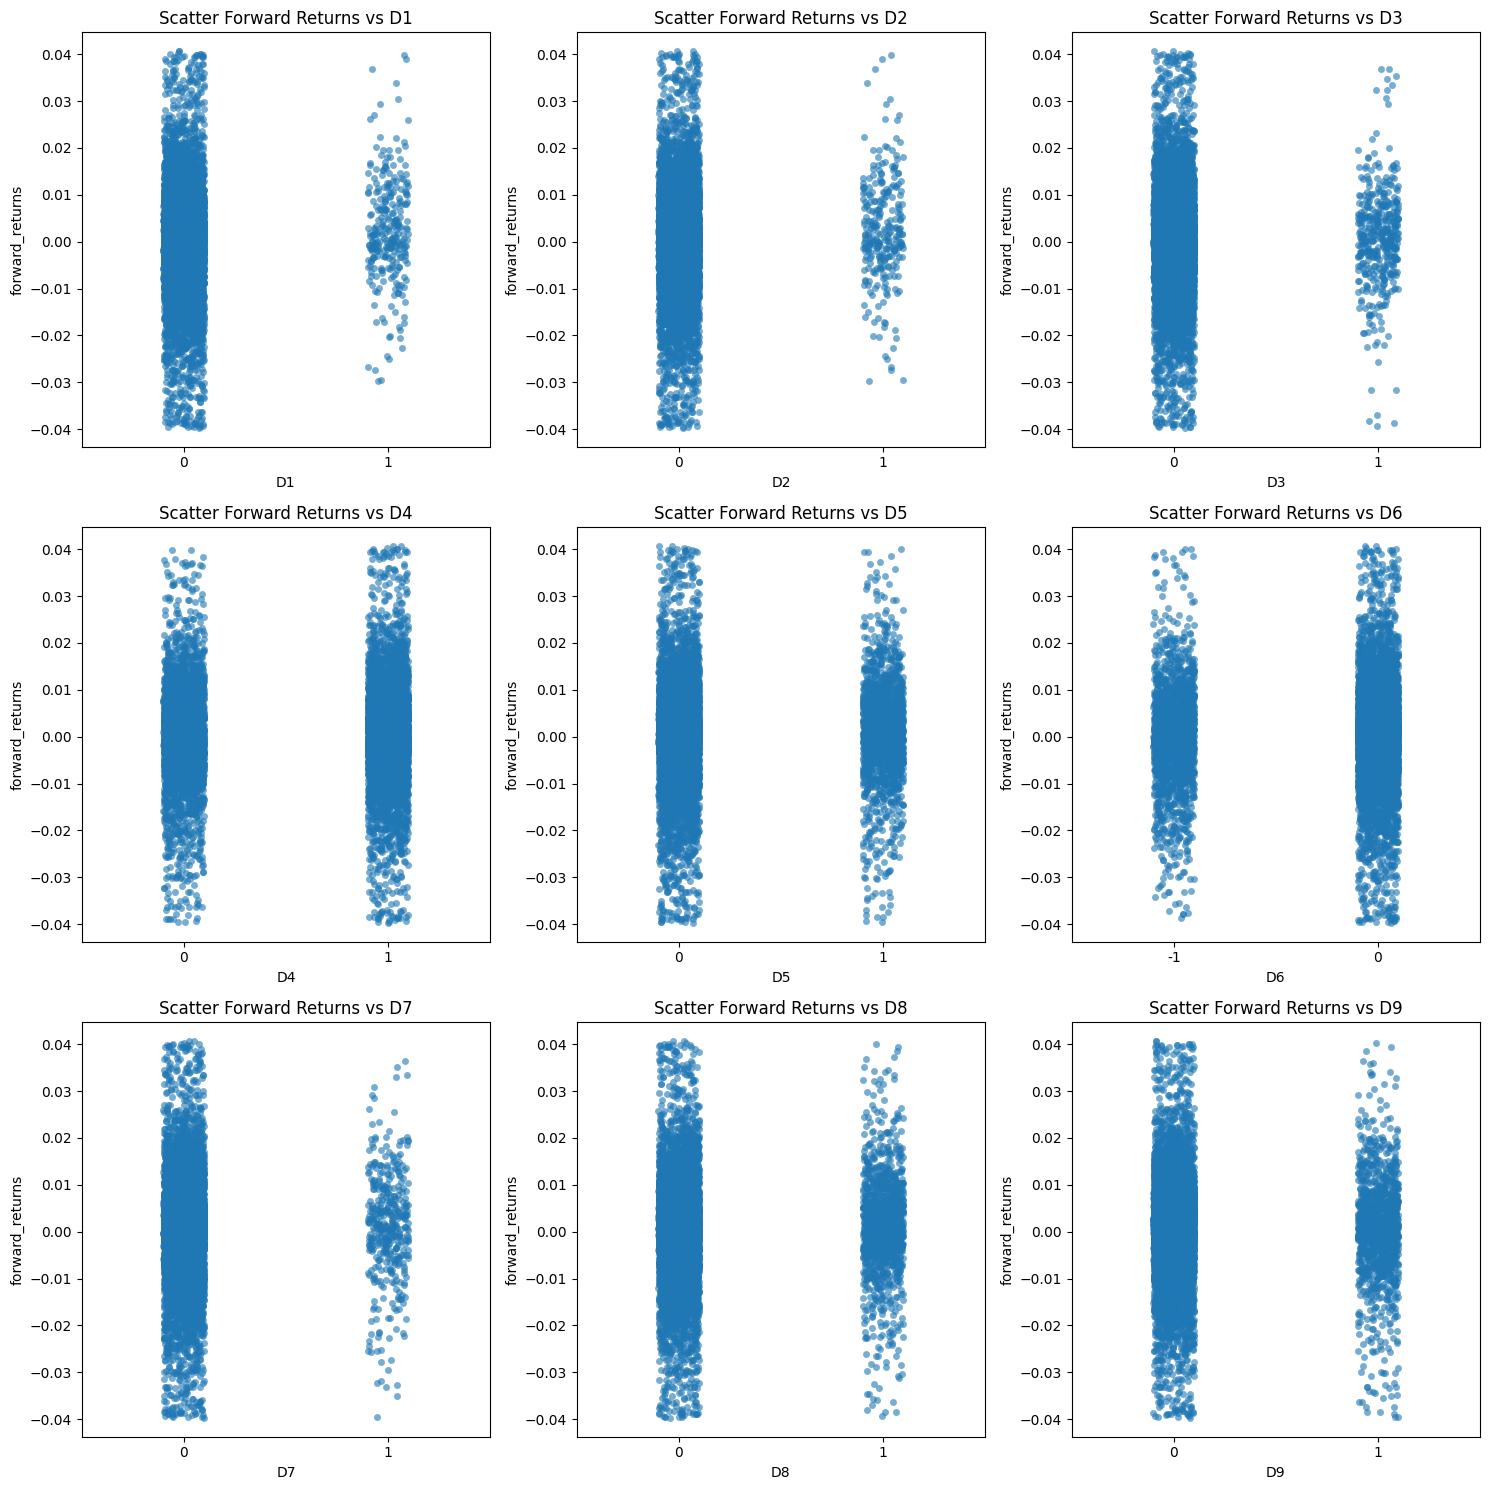

In [45]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='forward_returns', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Scatter Forward Returns vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_fr_vs_d.png')
plt.show()

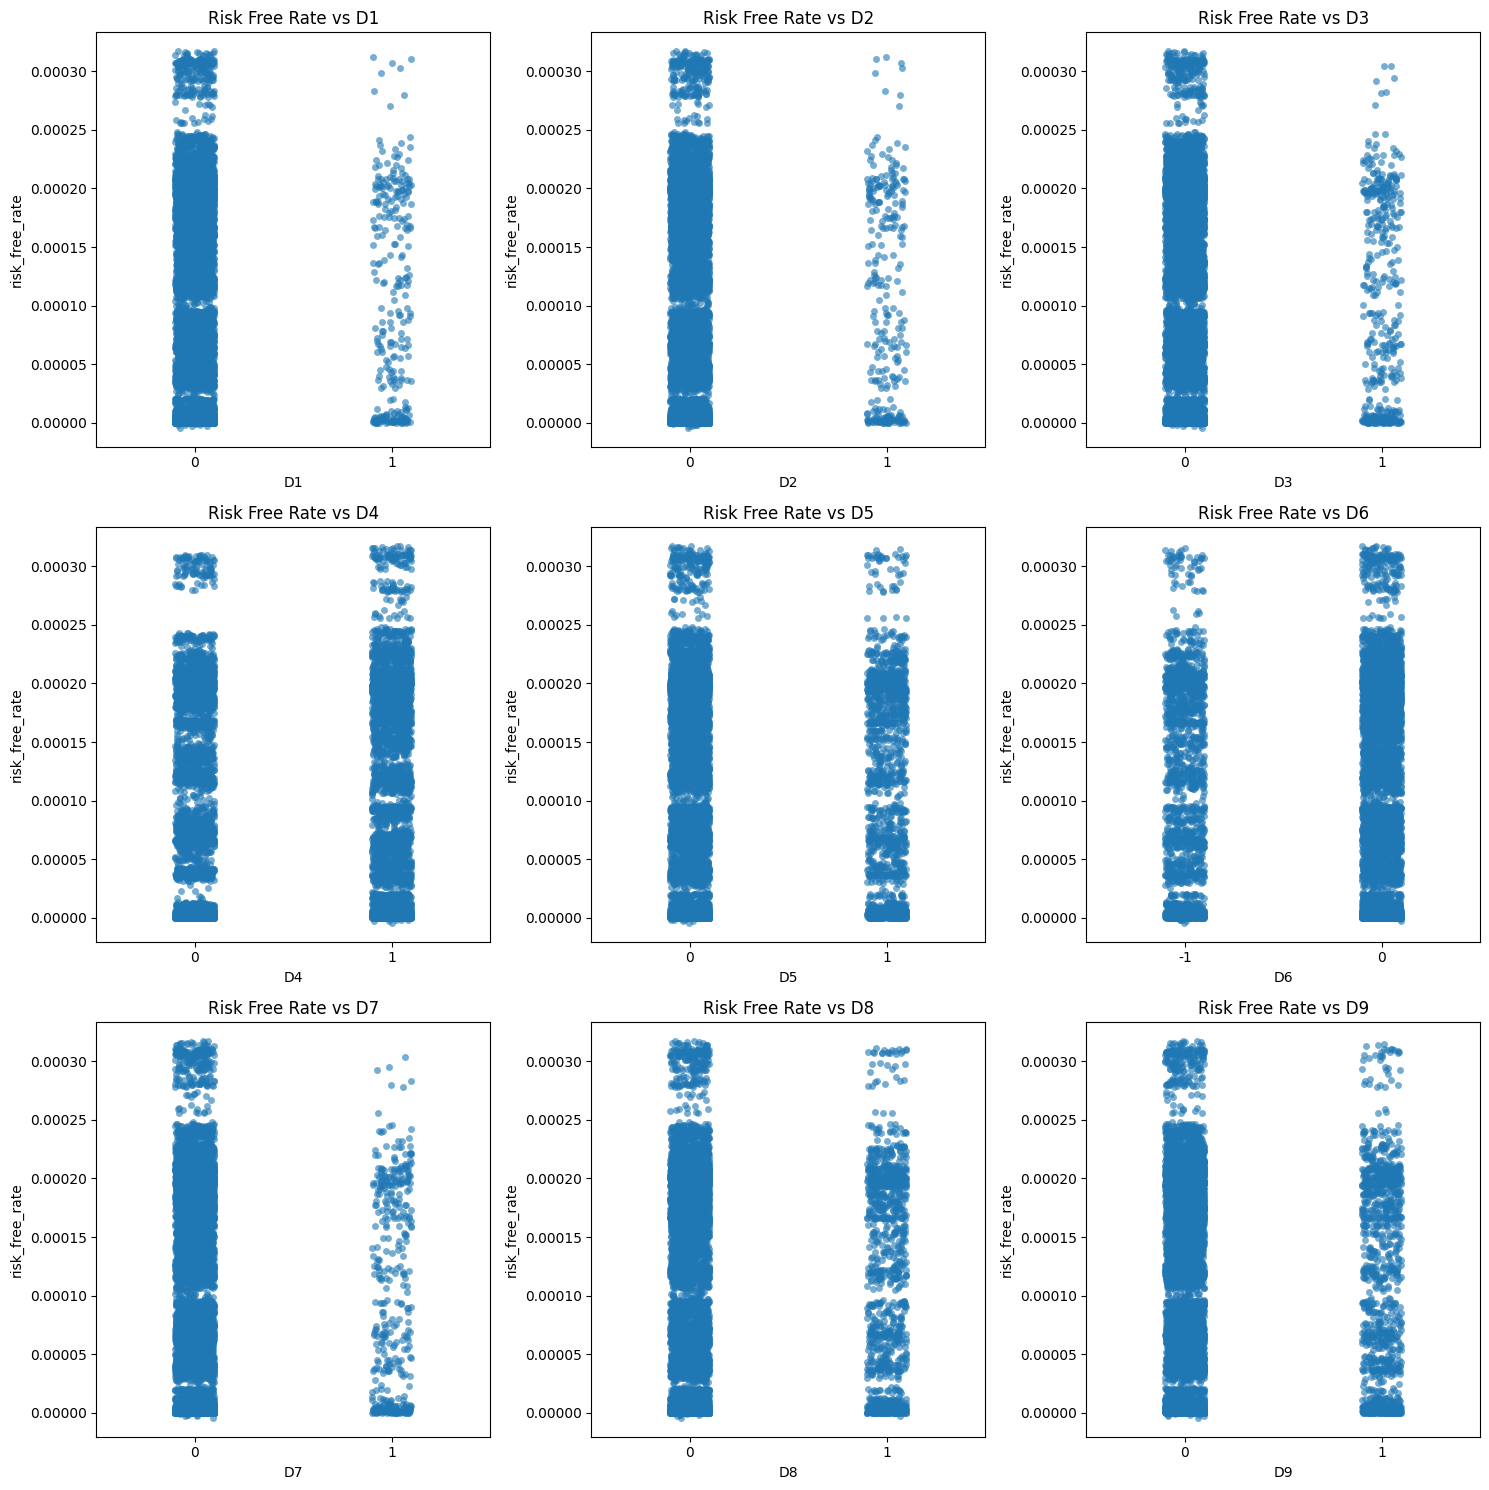

In [46]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='risk_free_rate', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Risk Free Rate vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_rfr_vs_d.png')
plt.show()

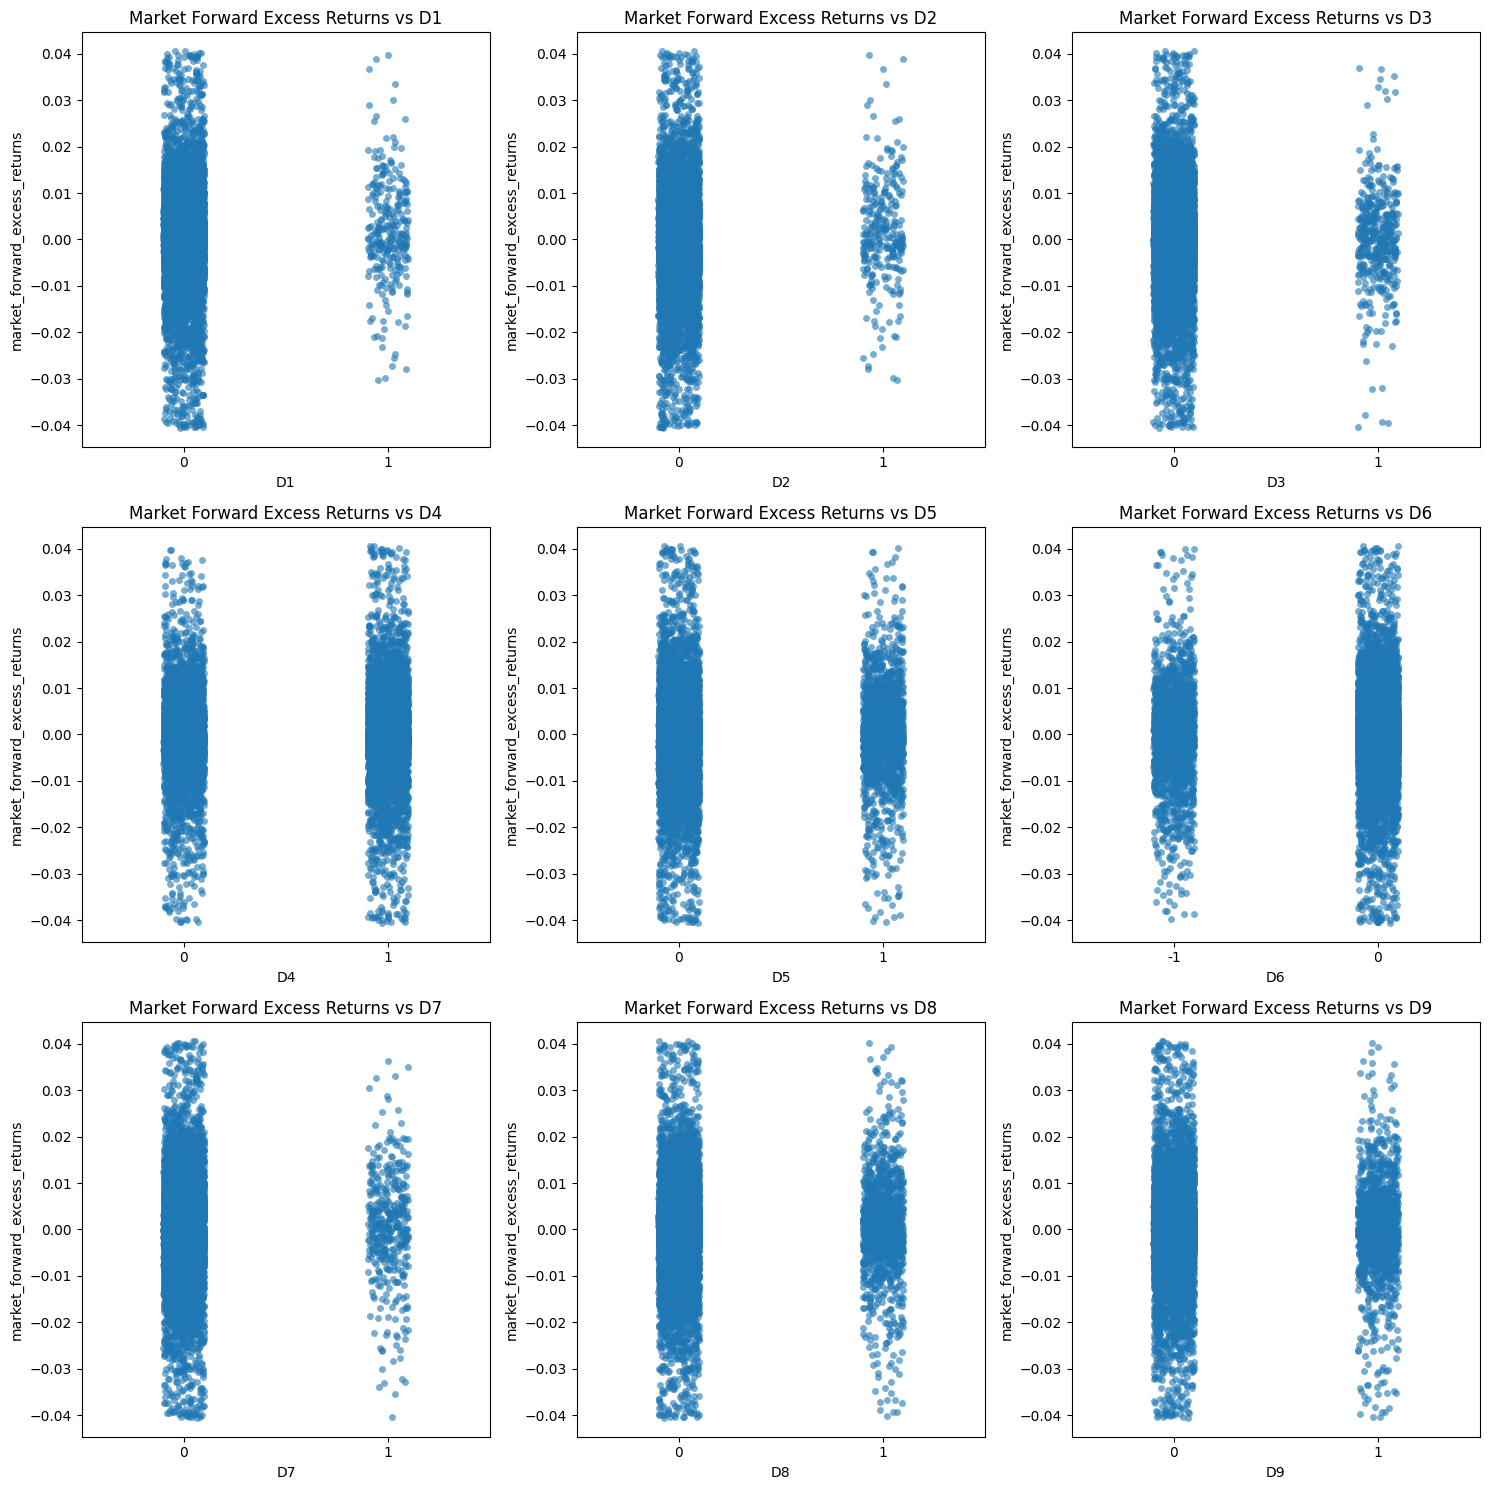

In [47]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='market_forward_excess_returns', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Market Forward Excess Returns vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_mfer_vs_d.png')
plt.show()

<h2>Notes</h2>
<ol>
<li><b>D1 through D9</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>D1 through D9</b> do not have a significant influence on the <b>Risk Free Rate</b></li>
<li><b>D1 through D9</b> do not show a significant response to Market <b>Forward Excess Returns</b></li>
</ol>


## 2. Dynamic Futures Market

In [5]:
df_dynamic = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('M')]].copy()
df_dynamic

,date_id,forward_returns,risk_free_rate,market_forward_excess_returns,M1,M10,M11,M12,M13,M14,...,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9
0,0,-0.002421,0.000301,-0.003038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,-0.008495,0.000303,-0.009114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,-0.009624,0.000301,-0.010243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.004662,0.000299,0.004046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,-0.011686,0.000299,-0.012301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0.002457,0.000155,0.001990,-1.190313,-0.262267,-0.253930,0.189556,-1.200115,-0.755640,...,0.286045,0.317130,-0.632252,1.138825,0.152280,1.359579,-0.187969,-0.571545,0.731812,0.331379
8986,8986,0.002312,0.000156,0.001845,-1.218842,-0.288451,-0.209835,0.138043,-1.193898,-0.754397,...,0.284722,0.316799,-0.418564,2.620436,0.097712,0.909058,-0.155919,-0.571308,0.772817,0.341697
8987,8987,0.002891,0.000156,0.002424,-1.234393,-0.292948,-0.140272,0.166052,-1.208305,-0.754255,...,0.279762,0.316468,0.501880,0.950040,0.061329,1.428299,-0.277512,-0.571071,0.854167,0.355097
8988,8988,0.008310,0.000156,0.007843,-1.297210,-0.302140,-0.116334,0.167373,-1.214693,-0.753453,...,0.282077,0.316138,-0.222224,0.948951,-0.006532,1.518843,-0.171653,-0.570834,0.773810,0.370644


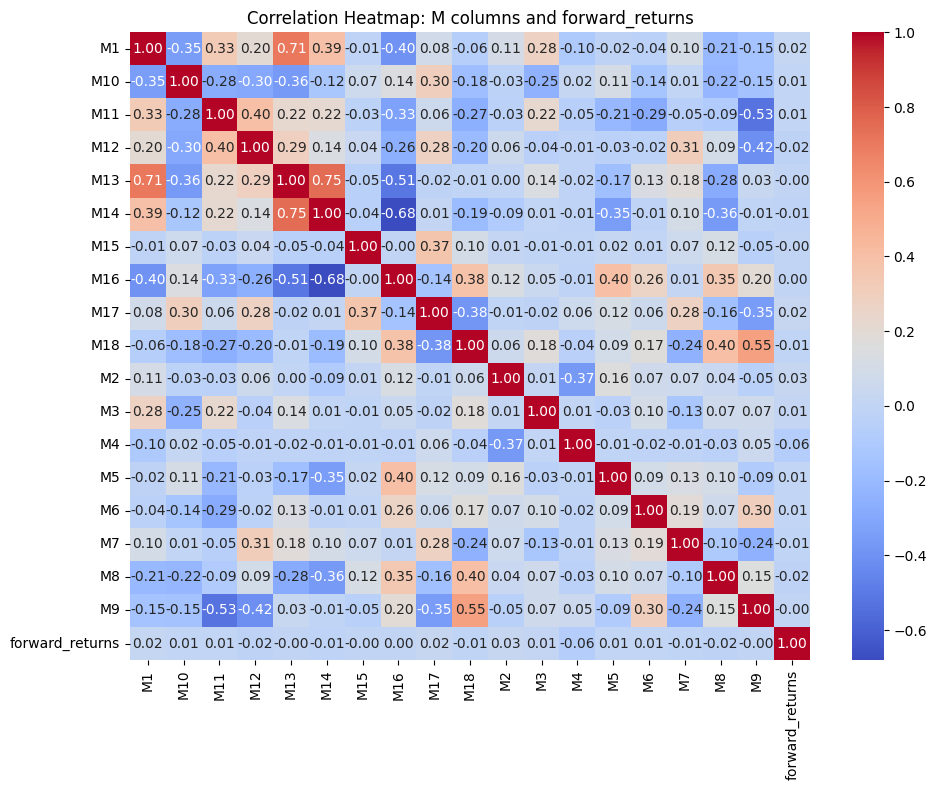

In [ ]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_forward_returns.png')
    plt.show()

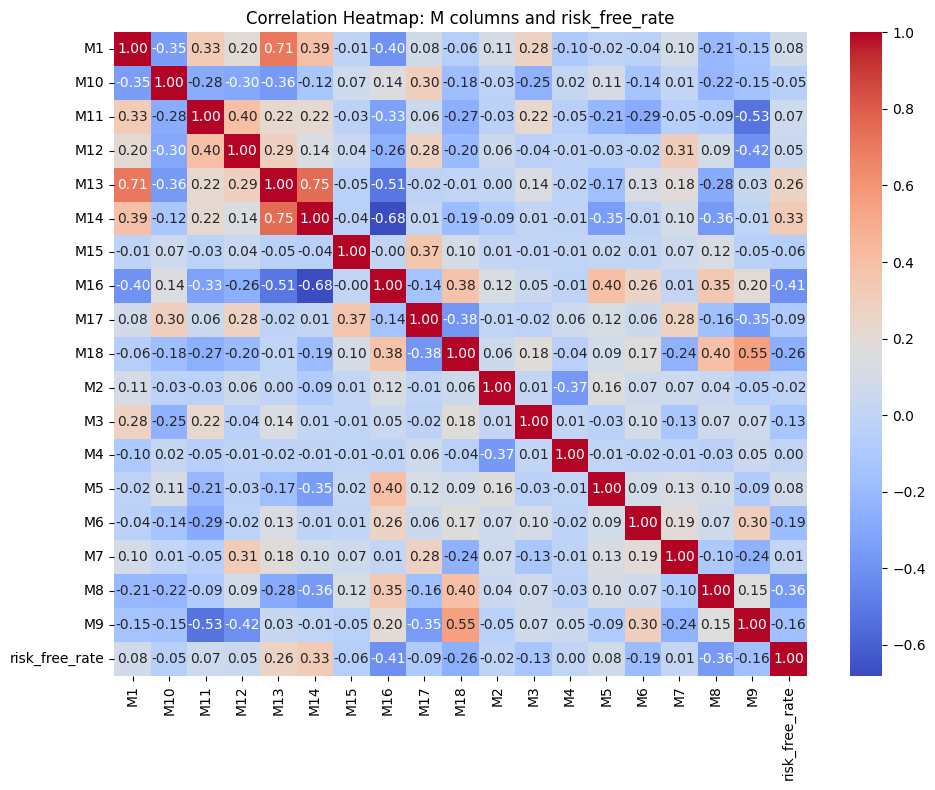

In [12]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_risk_free_rate.png')
    plt.show()

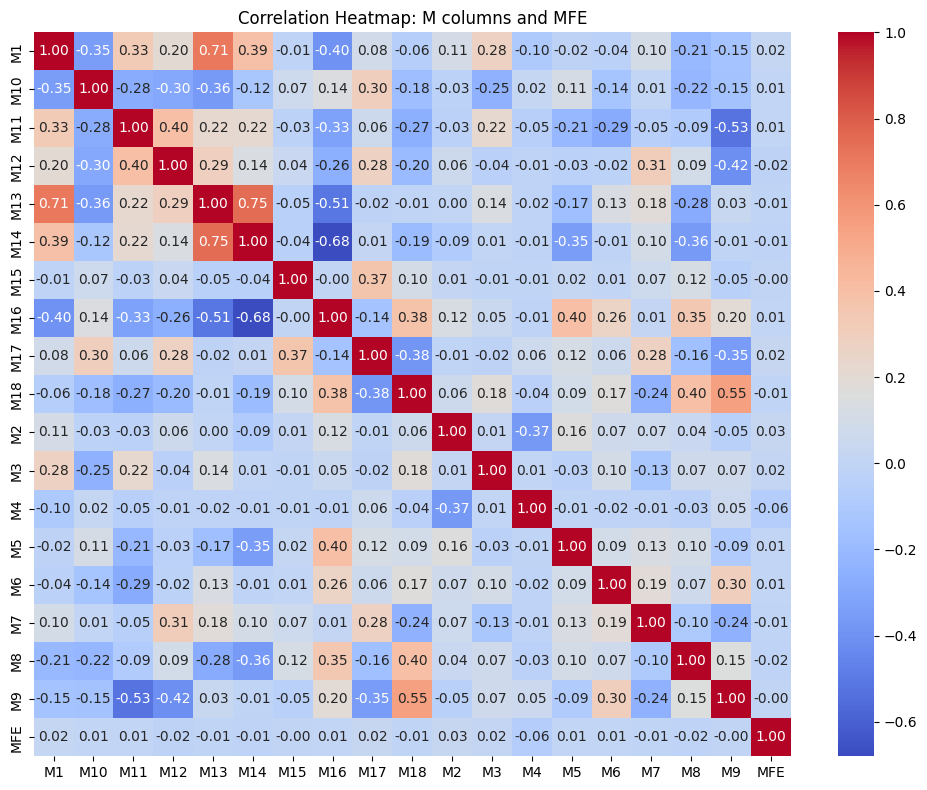

In [17]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>M1 through M18</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>M1 through M18</b> Has a fairly strong correlation <b>Risk Free Rate</b></li>
<li><b>M1 through M18</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 3. Econonmy Macro Analysis

In [3]:
df_macro = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('E')]].copy()
df_macro

,date_id,forward_returns,risk_free_rate,market_forward_excess_returns,E1,E10,E11,E12,E13,E14,...,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9
0,0,-0.002421,0.000301,-0.003038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,-0.008495,0.000303,-0.009114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,-0.009624,0.000301,-0.010243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.004662,0.000299,0.004046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,-0.011686,0.000299,-0.012301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0.002457,0.000155,0.001990,1.565379,0.184524,0.019180,0.019180,0.005952,0.005952,...,-0.122314,1.209250,1.540116,1.655174,0.031415,0.331680,0.034722,0.038269,-0.301876,0.914683
8986,8986,0.002312,0.000156,0.001845,1.562946,0.184193,0.018849,0.018849,0.005622,0.005622,...,-0.732397,1.225459,1.537761,1.672262,0.031085,0.331349,0.034392,0.038205,-0.301897,0.915013
8987,8987,0.002891,0.000156,0.002424,1.560520,0.183862,0.018519,0.018519,0.005291,0.005291,...,-0.800465,1.247273,1.534742,1.695469,0.030754,0.331019,0.034061,0.038118,-0.301918,0.915344
8988,8988,0.008310,0.000156,0.007843,1.558102,0.183532,0.018188,0.018188,0.004960,0.004960,...,-0.596939,1.271926,1.532340,1.721692,0.030423,0.330688,0.033730,0.037647,-0.301939,0.915675


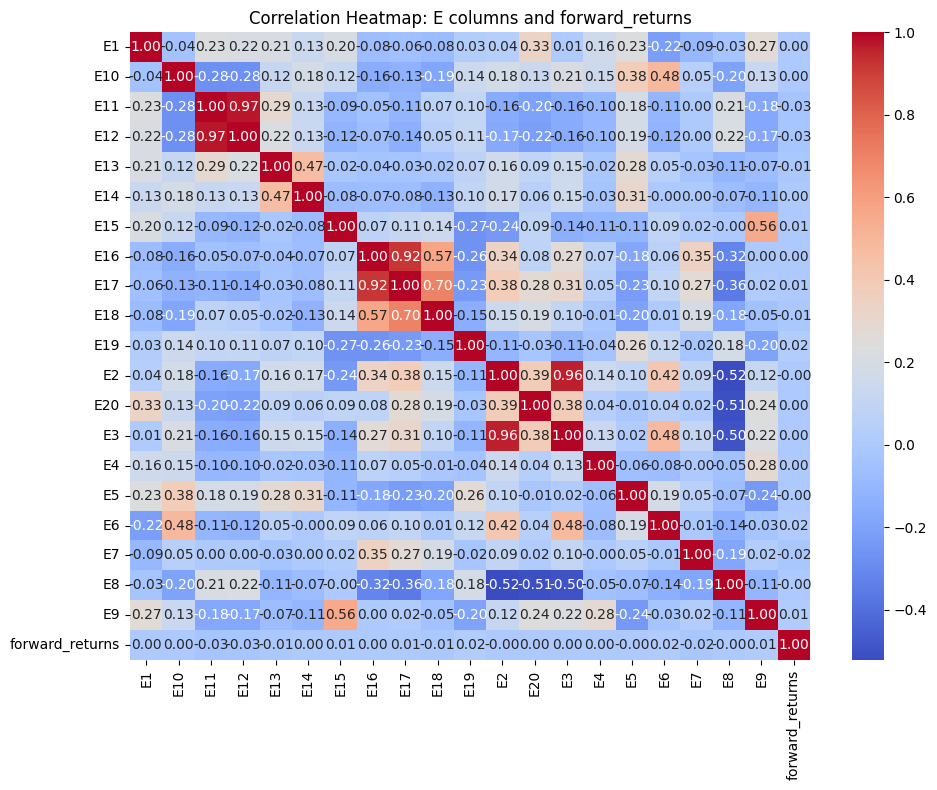

In [4]:

m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_forward_returns.png')
    plt.show()

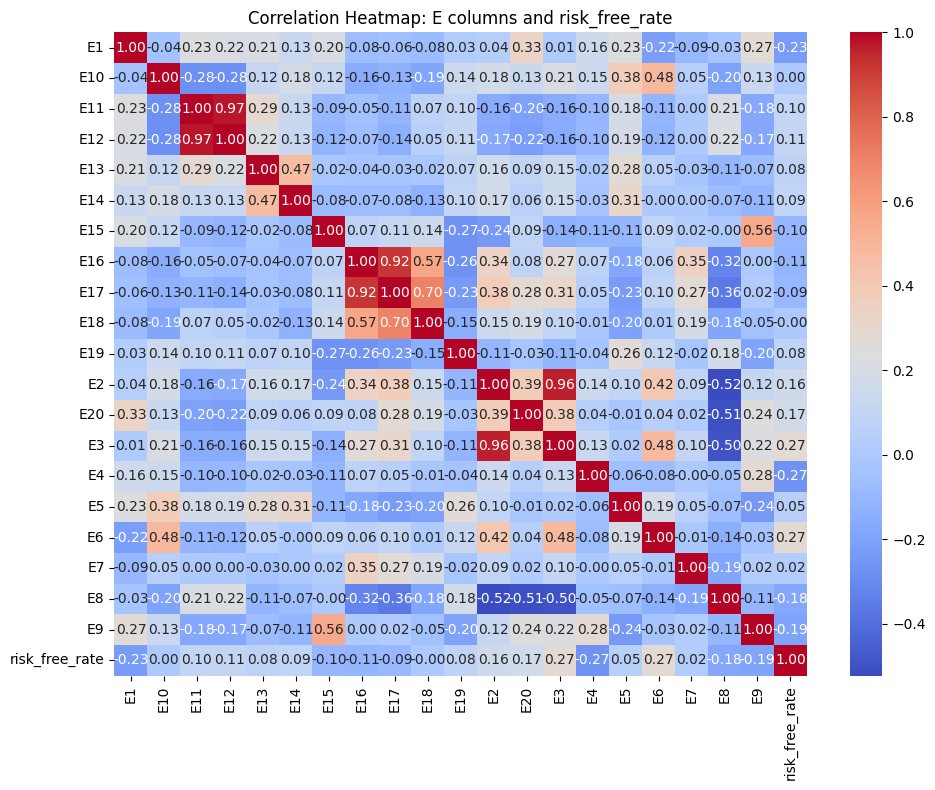

In [5]:

m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_risk_free_rate.png')
    plt.show()

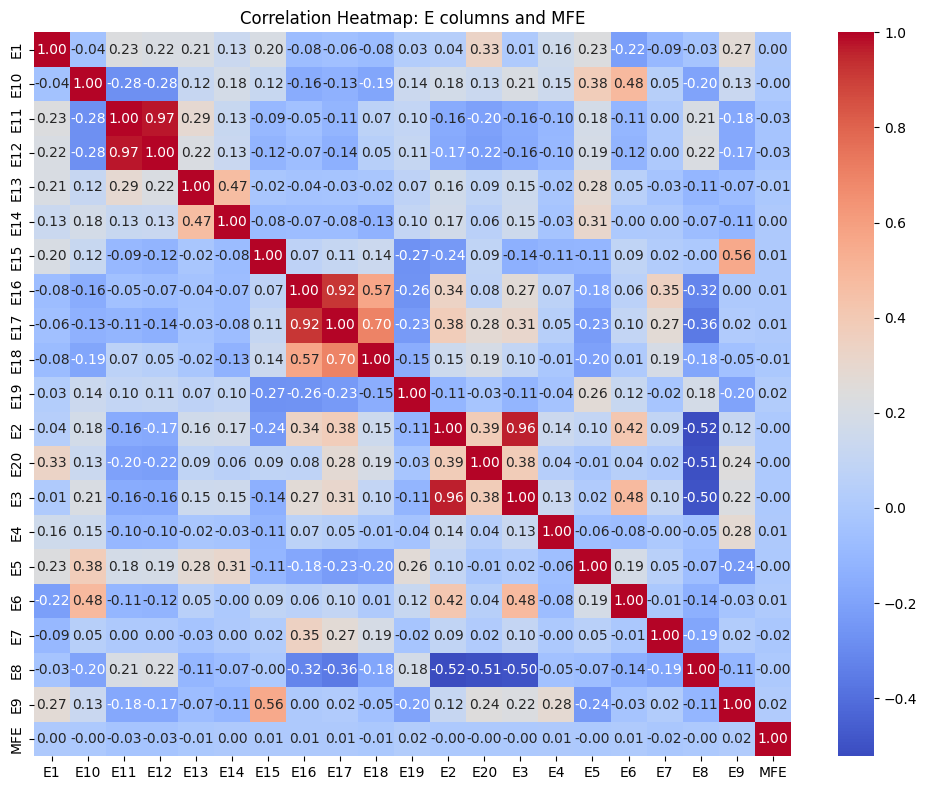

In [6]:
m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>E1 through E20</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>E1 through E20</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>E1 through E20</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 4. ...